In [1]:
import tensortools as tt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ground truth model
N, R = 20, 3
factors = [np.random.randn(N, R) for _ in range(3)]

# noisy data
data = np.einsum('ir,jr,kr->ijk', *factors) # low-rank part
sparse_noise = np.random.laplace(size=data.shape, scale=5.0) # add noise
sparse_noise[sparse_noise < 3.5] = 0.0

In [3]:
np.sum(sparse_noise > 0.1) / len(sparse_noise.ravel())

0.25774999999999998

In [4]:
# fit models
robust_results = tt.cp_batch_fit(data, 3, replicates=3, tol=1e-6, robust=True)
robust_factors = robust_results[R]['factors'][0]
robust_factors = tt.align_factors(robust_factors, factors)[0]

Optimizing rank-3 models.
   3/3 converged, min error = 0.0000, max error = 0.4221, mean error = 0.1407


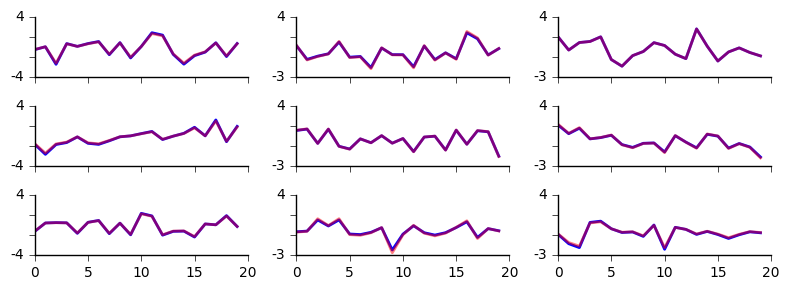

In [5]:
fig, axes = tt.plot_factors(factors, line_kw=dict(color='b', lw=2))
tt.plot_factors(robust_factors, line_kw=dict(color='r', lw=2, alpha=0.5), fig=fig);

In [6]:
als_results = tt.cp_batch_fit(data, range(1,9), replicates=10, tol=1e-6)
als_factors = als_results[R]['factors'][0]
als_factors = tt.align_factors(als_factors, factors)[0]

Optimizing rank-1 models.
   10/10 converged, min error = 0.6685, max error = 0.8544, mean error = 0.7614
Optimizing rank-2 models.
   10/10 converged, min error = 0.4224, max error = 0.7433, mean error = 0.4926
Optimizing rank-3 models.
   10/10 converged, min error = 0.0000, max error = 0.4219, mean error = 0.0422
Optimizing rank-4 models.
   10/10 converged, min error = 0.0000, max error = 0.0000, mean error = 0.0000
Optimizing rank-5 models.
   10/10 converged, min error = 0.0000, max error = 0.0001, mean error = 0.0000
Optimizing rank-6 models.
   10/10 converged, min error = 0.0000, max error = 0.0000, mean error = 0.0000
Optimizing rank-7 models.
   10/10 converged, min error = 0.0000, max error = 0.0000, mean error = 0.0000
Optimizing rank-8 models.
   10/10 converged, min error = 0.0000, max error = 0.0000, mean error = 0.0000


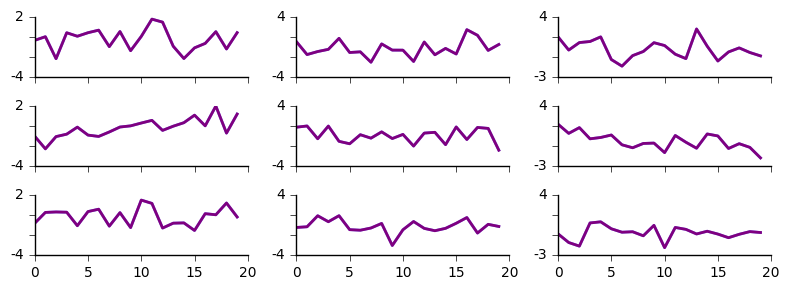

In [7]:
fig, axes = tt.plot_factors(als_factors, line_kw=dict(color='b', lw=2))
tt.plot_factors(als_factors, line_kw=dict(color='r', lw=2, alpha=0.5), fig=fig);

(<matplotlib.figure.Figure at 0x105998fd0>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1113cfc88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1120f8fd0>], dtype=object))

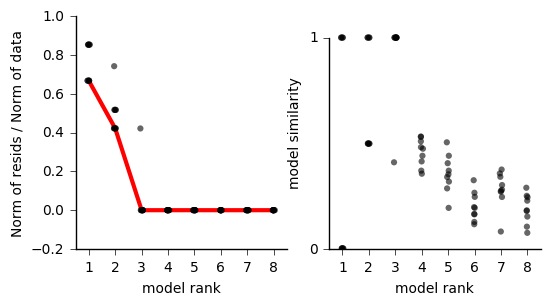

In [8]:
tt.plot_scree(als_results)

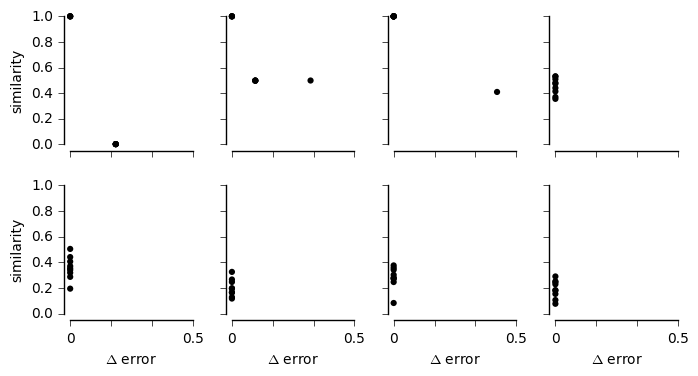

In [9]:
tt.plot_similarity(als_results, figsize=(8,4));